<a href="https://colab.research.google.com/github/soyebganja/NLP-Practice-Projects/blob/main/exercise/bag_of_n_grams_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bag of N grams tutorial**

Let's first understand how to generate n-grams using CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [9]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [10]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


preprocess("Loki is eating pizza")

'Loki eat pizza'

In [14]:
corpus_processed = [
    preprocess(text) for text in corpus
]
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [17]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [18]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

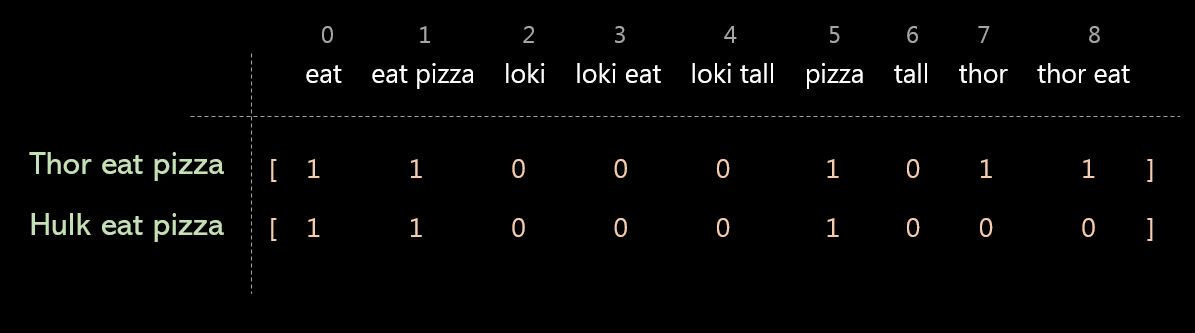


**News Category Classification Problem**

Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1.  BUSINESS
2.  SPORTS
3.  CRIME
4.  SCIENCE

**Dataset**

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65



*   This data consists of two columns. - Text - Category
*   Text is a news article
*   Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset





    
    



In [20]:
import pandas as pd

df = pd.read_json("news_dataset.json")

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [21]:
df.category.value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381



**Handle class imbalance**

As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

There are various ways of handling class imbalance which I have discussed in this video: https://www.youtube.com/watch?v=JnlM4yLFNuo

Out of those techniques, I will use **undersampling** technique here.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.


In [24]:
min_samples = 1381

df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state=2022)

In [26]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science])

df_balanced.category.value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


**Convert text category to a number**

In [48]:
df_balanced["category_num"] = df_balanced.category.map({
    "BUSINESS": 0,
    "SPORTS": 1,
    "CRIME": 2,
    "SCIENCE": 3
})

df_balanced.sample(5)

,text,category,category_num
6782,Sport and Society for Arete-Goodell's Press Co...,SPORTS,1
278,"Florida Dad Let Teen Daughter Dance, Do Drugs ...",CRIME,2
11052,Tampa Police Arrest Suspect Amid Serial Killer...,CRIME,2
8680,Breaking the Rules -- And Feeling Good About I...,SCIENCE,3
780,Neil deGrasse Tyson Burns Donald Trump Over Po...,SCIENCE,3


**Build a model with original text (no pre processing)**

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [50]:
print(X_train.shape)
X_train.head()

(4419,)


,text
7589,Ovulating Women Prefer Images of Penetration O...
10442,Scientists Discover Spooky Influence On Baby N...
8792,Olympic Race Walker Steps Up To Propose To His...
1733,Beloved Bipedal Bear Named Pedals Believed Kil...
2526,"Elizabeth Smart Gave Birth To Baby Girl, Fathe..."


In [51]:
y_train.value_counts()

,count
category_num,
3,1105
2,1105
0,1105
1,1104


In [52]:
y_test.value_counts()

,count
category_num,
1,277
0,276
3,276
2,276


**Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model**

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),
    ('multi_nb', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       276
           1       0.93      0.82      0.87       277
           2       0.81      0.91      0.86       276
           3       0.92      0.83      0.87       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



**Attempt 2 : Use 1-gram and bigrams**

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('multi_nb', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [55]:
X_test[:5]

,text
3716,African Nation Slaps Exxon With Fine Nearly 7 ...
608,These Cringe-Worthy Stories Show It Can Be Har...
11172,LISTEN: The Accidental Discovery That Proved T...
1346,Build Loyalty -- The Cost -- $00.00 Remember y...
1356,Man Killed By Michigan Police Wasn't Targeting...


In [56]:
y_test[:5]

,category_num
3716,0
608,3
11172,3
1346,0
1356,2


In [57]:
y_pred[:5]

array([0, 0, 3, 0, 2])

**Categories**

*   BUSINESS: 0
*   SPORTS: 1
*   CRIME: 2
*   SCIENCE: 3





**Attempt 3 : Use 1-gram to trigrams**

In [65]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       276
           1       0.94      0.82      0.87       277
           2       0.82      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105




**Use text pre-processing to remove stop words, punctuations and apply lemmatization**

You may wonder, we have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text


In [58]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess)
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


**Build a model with pre processed text**

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [60]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('multi_nb', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       276
           1       0.94      0.82      0.87       277
           2       0.82      0.91      0.86       276
           3       0.91      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105





If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

**Plot confusion matrix**


In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[242,   7,  16,  11],
       [ 12, 226,  33,   6],
       [ 17,   2, 252,   5],
       [ 37,   6,   7, 226]])

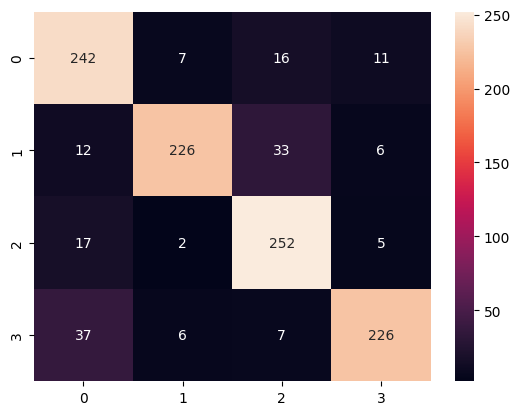

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.show()